# Triage Classifer Using Tree Base Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
disease = pd.read_csv("Data/Disease Dataset.csv",index_col=False)

In [3]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [4]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 150

In [5]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
#Disease diagnoeses are named prognosis for whatever strange reason, column will be renamed.
disease = disease.rename(columns={"prognosis": "diagnosis"}, errors="raise")

In [7]:
#Phantom column at 133 exists
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'diagnosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [8]:
disease.shape

(4920, 134)

In [9]:
#no missing values except for column #133
disease.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [10]:
#drop phantom column 133
disease.dropna(how='all', axis='columns')

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,diagnosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [11]:
#Fluid_overload contains no values, acutal data is contained in fluid_overload.1
disease.sum()

itching                                                                         678
skin_rash                                                                       786
nodal_skin_eruptions                                                            108
continuous_sneezing                                                             222
shivering                                                                       108
chills                                                                          798
joint_pain                                                                      684
stomach_pain                                                                    222
acidity                                                                         222
ulcers_on_tongue                                                                108
muscle_wasting                                                                  108
vomiting                                                                    

In [12]:
#unnamed column still appears
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [13]:
#solution: rename with dict, then drop
disease.rename({"Unnamed: 133":"a"}, axis="columns", inplace=True)
disease.drop(["a"], axis=1, inplace=True)

In [14]:
#finally gone
disease.isnull().sum() / len(disease.index)

itching                           0.0
skin_rash                         0.0
nodal_skin_eruptions              0.0
continuous_sneezing               0.0
shivering                         0.0
chills                            0.0
joint_pain                        0.0
stomach_pain                      0.0
acidity                           0.0
ulcers_on_tongue                  0.0
muscle_wasting                    0.0
vomiting                          0.0
burning_micturition               0.0
spotting_ urination               0.0
fatigue                           0.0
weight_gain                       0.0
anxiety                           0.0
cold_hands_and_feets              0.0
mood_swings                       0.0
weight_loss                       0.0
restlessness                      0.0
lethargy                          0.0
patches_in_throat                 0.0
irregular_sugar_level             0.0
cough                             0.0
high_fever                        0.0
sunken_eyes 

In [15]:
#confirm fluid_overload has no useful data
disease.fluid_overload.value_counts()

0    4920
Name: fluid_overload, dtype: int64

In [16]:
#confirm fluid_overload.1 has data that could be useful
disease['fluid_overload.1'].value_counts()

0    4806
1     114
Name: fluid_overload.1, dtype: int64

In [17]:
#drop fluid_overload and rename fluid_overload.1 to fluid_overload
disease = disease.drop(['fluid_overload'], axis = 1)
disease = disease.rename(columns={'fluid_overload.1': 'fluid_overload'}, errors="raise")

In [18]:
#diagnosis has uniform distrubtion
disease.diagnosis.value_counts()

Peptic ulcer diseae                        120
Typhoid                                    120
AIDS                                       120
Paralysis (brain hemorrhage)               120
GERD                                       120
Hepatitis D                                120
Jaundice                                   120
hepatitis A                                120
Chicken pox                                120
Hepatitis B                                120
Chronic cholestasis                        120
Malaria                                    120
Drug Reaction                              120
Allergy                                    120
(vertigo) Paroymsal  Positional Vertigo    120
Arthritis                                  120
Hepatitis C                                120
Alcoholic hepatitis                        120
Hypothyroidism                             120
Psoriasis                                  120
Urinary tract infection                    120
Common Cold  

In [19]:
#copy values of diagnosis to new column triage
disease['triage'] = disease['diagnosis'].values

In [20]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,diagnosis,triage
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,Fungal infection


In [21]:
#map triage categories from diagnosis to triage column

#triage category can be changed using the dictionary

#1 Immediate Care Need
#2 Care Needed within a week
#3 Address at next visit
#4 Need more information for triage

disease = disease.replace({'triage': {'Paralysis (brain hemorrhage)':1,'Pneumonia':1,'Bronchial Asthma':1,'Tuberculosis':1,
                            'Typhoid':1, 'Chicken pox':1,'Heart attack':1,'Drug Reaction':1, 'Malaria':1, 'Dengue':1,
                            'Fungal infection': 2,'Hepatitis E':2,'Alcoholic hepatitis':2, 'Hepatitis B':2,'Hepatitis C':2,
                            'hepatitis A':2, 'Urinary tract infection':2, 'AIDS':2,'Allergy':4,'Psoriasis':3,'Acne':3,
                           'Arthritis':3,'(vertigo) Paroymsal  Positional Vertigo':3,'Dimorphic hemmorhoids(piles)':3,
                           'Osteoarthristis':3,'GERD':3,'Migraine':3,'Hyperthyroidism':3,'Varicose veins':3,'Hepatitis D':1,
                           'Common Cold':4,'Impetigo':4,'Hypertension ':4,'Cervical spondylosis':4,'Diabetes ':4,
                            'Gastroenteritis':4,'Jaundice':4,'Chronic cholestasis':4,'Peptic ulcer diseae':4,'Hypoglycemia':4,
                                      'Hypothyroidism':3}})

In [22]:
#confirm all triage changes have been made
disease.triage.value_counts()

3    1320
1    1320
4    1320
2     960
Name: triage, dtype: int64

In [23]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,diagnosis,triage
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [24]:
disease.shape

(4920, 133)

# Initial Triage System Model Test

In [25]:
#Split data for decision tree
y = disease['triage']
X = disease.drop(['triage','diagnosis'], axis =1)

In [26]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()

In [28]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
predicted_train = treemodel.predict(X_train)
accuracy_score(y_train, predicted_train)

1.0

In [30]:
y_pred = treemodel.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       268
           2       1.00      1.00      1.00       216
           3       1.00      1.00      1.00       258
           4       1.00      1.00      1.00       242

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



Data leakage is likely, we need to clean the dataset to remove interrelated features. Not clear if any features are causing the data leakage. I will implement Cramer’s test to assess relatedness of symptoms. 

# Cramer's Tests

In [33]:
#function that preforms cramers test on two given variables. 
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [34]:
#execute cramers test on disease df
rows= []

for var1 in disease:
  col = []
  for var2 in disease :
    cramers =cramers_V(disease[var1], disease[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = disease.columns, index =disease.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

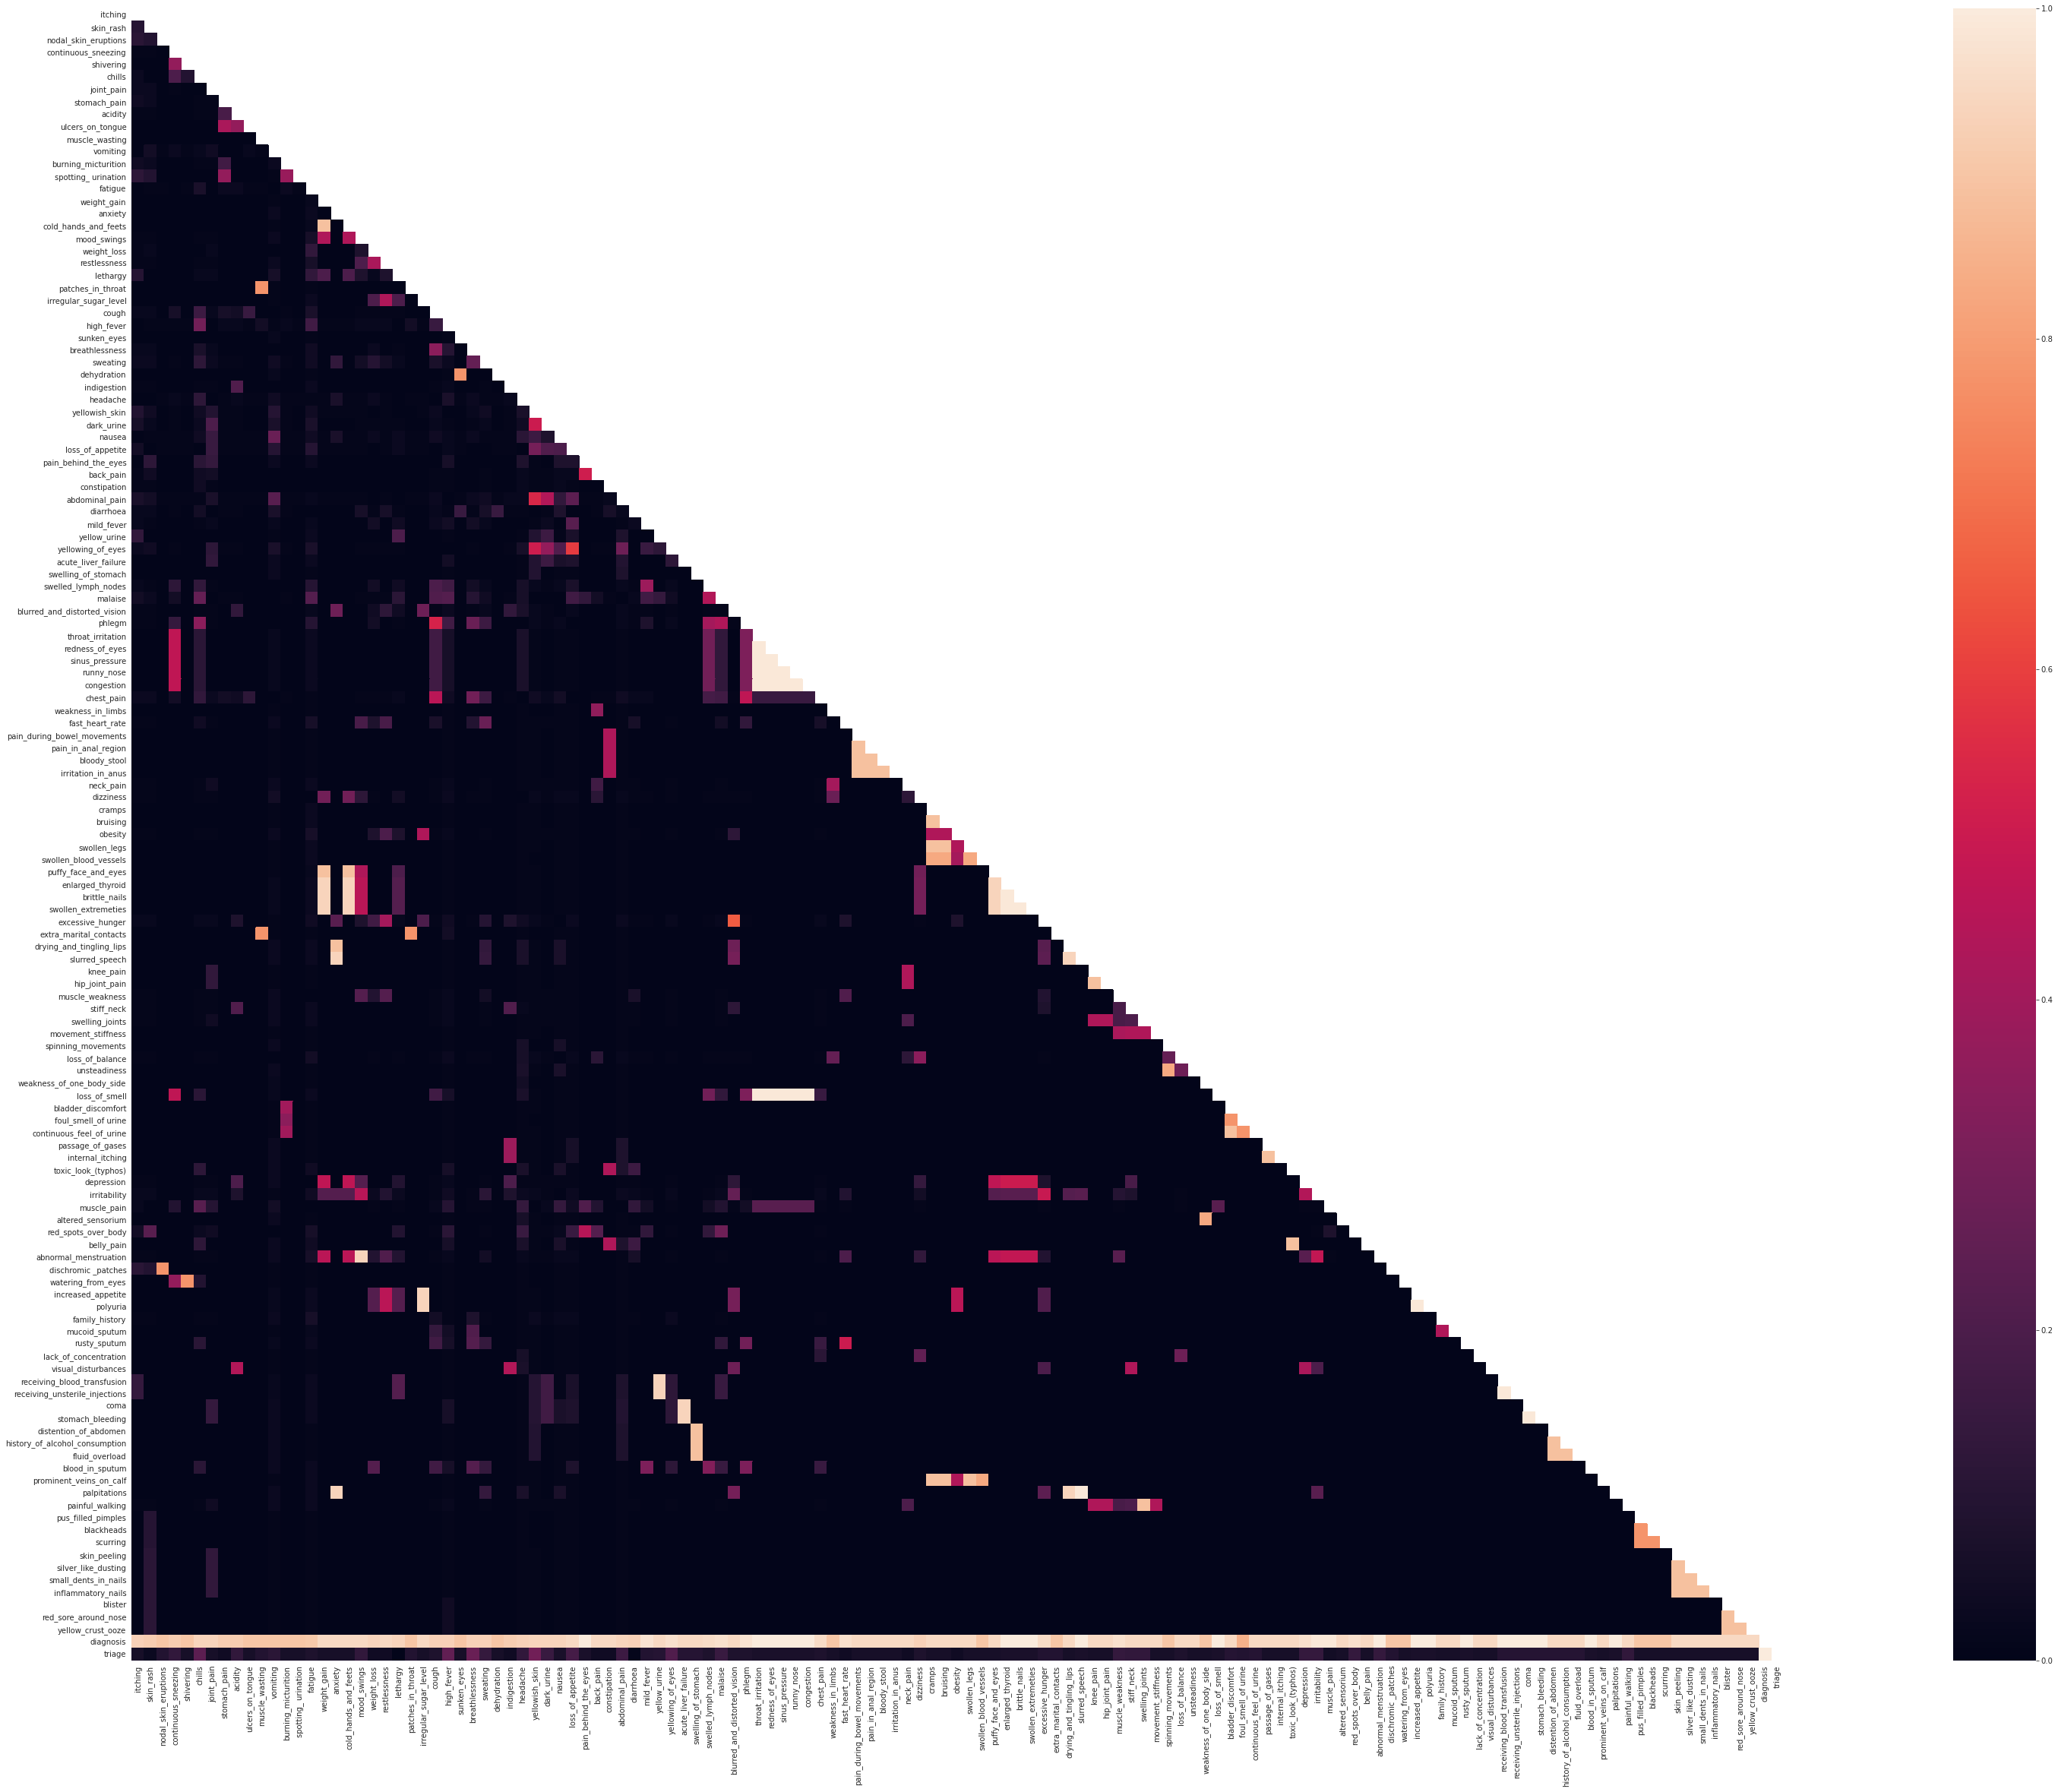

In [35]:
#heatmap for dataset
plt.figure(figsize=(80,40))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, xticklabels =True, yticklabels =True)

plt.show()

In [36]:
#df of all test results for cleaning
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,diagnosis,triage
itching,1.00,0.10,0.11,0.01,0.00,0.03,0.03,0.04,0.01,0.00,0.00,0.00,0.04,0.12,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.10,0.00,0.00,0.02,0.00,0.00,0.02,0.03,0.00,0.01,0.00,0.09,0.06,0.00,0.05,0.00,0.01,0.01,0.07,0.02,0.02,0.13,0.03,0.00,0.00,0.02,0.05,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.02,0.00,0.05,0.00,0.01,0.11,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.14,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.93,0.06
skin_rash,0.10,1.00,0.09,0.01,0.00,0.00,0.03,0.03,0.01,0.00,0.00,0.05,0.03,0.09,0.01,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.02,0.03,0.00,0.01,0.00,0.04,0.02,0.01,0.00,0.12,0.04,0.01,0.05,0.02,0.01,0.00,0.04,0.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.23,0.00,0.01,0.09,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.10,0.10,0.10,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.92,0.03
nodal_skin_eruptions,0.11,0.09,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

We will remove symptoms that have a strong relationship (> 0.4) with other symptoms using the following set of rules:

1)Drop any symptom that a nonmedically trained person would be unable or highly unlikely to identify correctly.

2)Drop any symptom that is highly related with a set of substantially similar symptoms.

3)Clean any binary interrelationship by dropping the symptom that would be more difficult to detect or diagnosis accurately. 

In [37]:
# We will drop features that have a cramers score higher than ~.3 according to above logic
disease_clean = disease.drop(['weight_gain','anxiety','cold_hands_and_feets','yellow_urine','acute_liver_failure',
                        'loss_of_smell','fluid_overload','swelling_of_stomach','redness_of_eyes','sinus_pressure',
                       'runny_nose','congestion','prominent_veins_on_calf','brittle_nails','swollen_extremeties',
                       'high_fever','breathlessness','loss_of_appetite','yellowish_skin','vomiting','yellowing_of_eyes',
                       'itching','abdominal_pain','chills','sweating','headache','dark_urine','nausea','weight_loss',
                       'dizziness','muscle_pain','malaise','joint_pain','mild_fever','red_spots_over_body','palpitations',
                       'irregular_sugar_level','abnormal_menstruation','swelling_joints','coma','increased_appetite',
                        'enlarged_thyroid','receiving_blood_transfusion','receiving_unsterile_injections','skin_peeling',
                       'blister','pain_in_anal_region','drying_and_tingling_lips','toxic_look_(typhos)','excessive_hunger',
                       'cramps','bruising','irritation_in_anus','bloody_stool','swollen_blood_vessels','spinning_movements',
                       'movement_stiffness','yellow_crust_ooze','distention_of_abdomen','small_dents_in_nails','scurring',
                        'visual_disturbances','extra_marital_contacts','inflammatory_nails','hip_joint_pain','altered_sensorium',
                       'continuous_feel_of_urine','internal_itching','dischromic _patches','shivering','muscle_wasting',
                       'blackheads','sunken_eyes','bladder_discomfort','cough','phlegm','swelled_lymph_nodes','ulcers_on_tongue',
                       'acidity','painful_walking','obesity','constipation', 'throat_irritation','back_pain','mood_swings',
                        'restlessness','fast_heart_rate','depression','rusty_sputum','neck_pain','spotting_ urination',
                       'mucoid_sputum','watering_from_eyes','passage_of_gases'],axis = 1)

In [38]:
disease_clean.head()

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,diagnosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [39]:
#Cramers test for cleaned dataset
rows= []

for var1 in disease_clean:
  col = []
  for var2 in disease_clean:
    cramers =cramers_V(disease_clean[var1], disease_clean[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
clean_heatmap = pd.DataFrame(cramers_results, columns = disease_clean.columns, index =disease_clean.columns)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

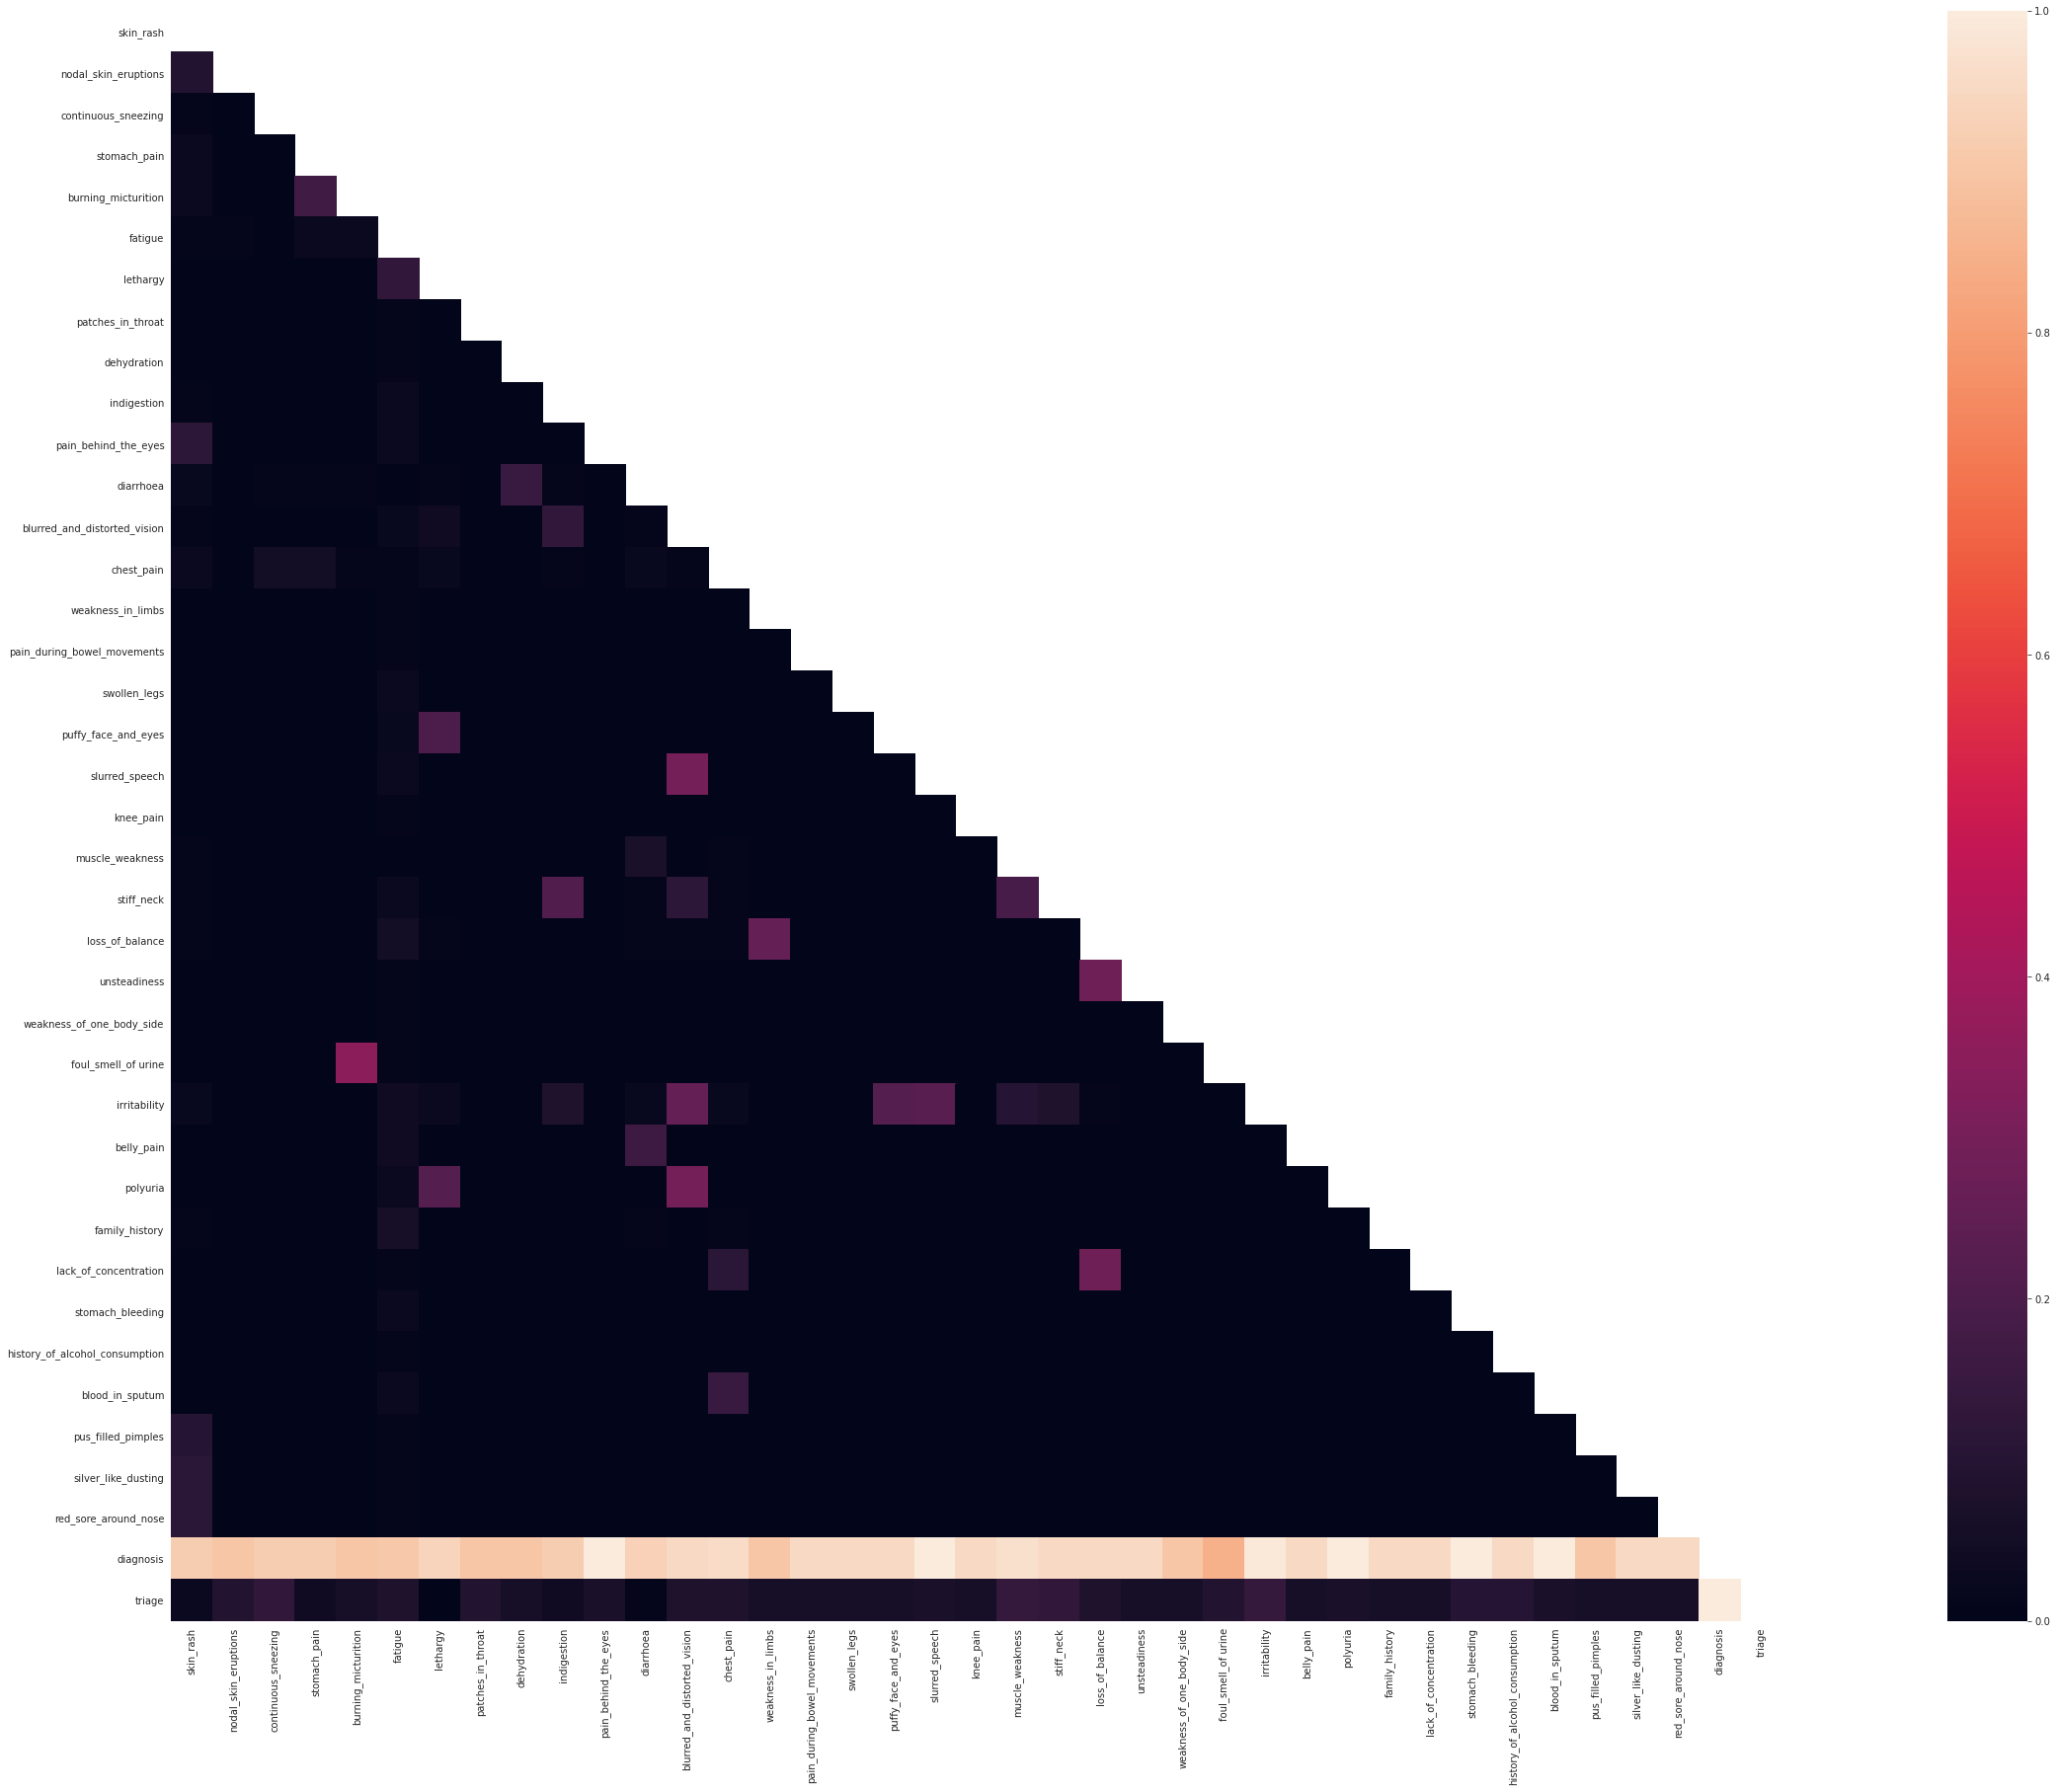

In [40]:
#heatmap for cleaned dataset
plt.figure(figsize=(60,30))

mask = np.zeros_like(clean_heatmap, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(clean_heatmap, mask=mask,vmin=0., vmax=1, square=True, xticklabels =True, yticklabels =True)
plt.show()

In [41]:
#major clusters of highly related features are gone
clean_heatmap

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,diagnosis,triage
skin_rash,1.00,0.09,0.01,0.03,0.03,0.01,0.00,0.00,0.00,0.01,0.12,0.02,0.01,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.10,0.11,0.11,0.92,0.03
nodal_skin_eruptions,0.09,0.99,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.09
continuous_sneezing,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.13
stomach_pain,0.03,0.00,0.00,1.00,0.17,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.04
burning_micturition,0.03,0.00,0.00,0.17,1.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.06
fatigue,0.01,0.01,0.00,0.03,0.03,1.00,0.13,0.01,0.01,0.03,0.03,0.00,0.02,0.01,0.01,0.01,0.03,0.02,0.03,0.01,0.00,0.03,0.05,0.01,0.01,0.01,0.04,0.04,0.03,0.06,0.01,0.03,0.01,0.03,0.01,0.01,0.01,0.91,0.08
lethargy,0.00,0.00,0.00,0.00,0.00,0.13,1.00,0.00,0.00,0.00,0.00,0.01,0.04,0.02,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.00
patches_in_throat,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.09
dehydration,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.99,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.06
indigestion,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,1.00,0.00,0.01,0.13,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.04


# Decision Trees Model

In [42]:
y = disease_clean['triage']
X = disease_clean.drop(['triage','diagnosis'], axis =1)

In [43]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()

In [45]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
predicted_train = treemodel.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9057418699186992

In [47]:
y_pred = treemodel.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.883130081300813

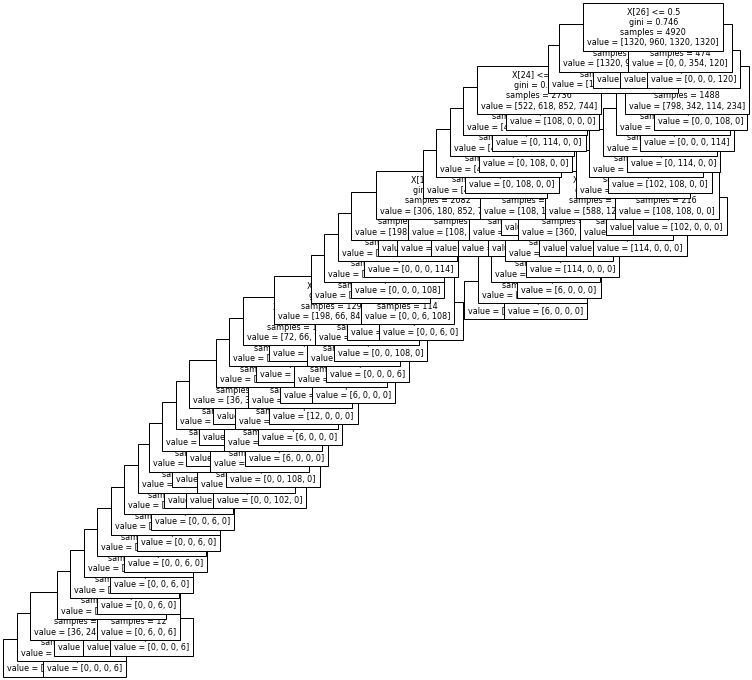

In [49]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(treemodel.fit(X, y), fontsize=8)
plt.show()

30 Layers is too many for explantion, we will try again with 3 and see how much accuracy we lose

In [50]:
treemodel_max3 = DecisionTreeClassifier(max_depth=3)

In [51]:
treemodel_max3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
predicted_train = treemodel_max3.predict(X_train)
accuracy_score(y_train, predicted_train)

0.4761178861788618

In [53]:
y_pred = treemodel_max3.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.4796747967479675

Confusion matrix, without normalization
[[163   0 105   0]
 [ 79   0 137   0]
 [ 20   0 238   0]
 [ 38   0 133  71]]
Normalized confusion matrix
[[0.60820896 0.         0.39179104 0.        ]
 [0.36574074 0.         0.63425926 0.        ]
 [0.07751938 0.         0.92248062 0.        ]
 [0.15702479 0.         0.54958678 0.29338843]]


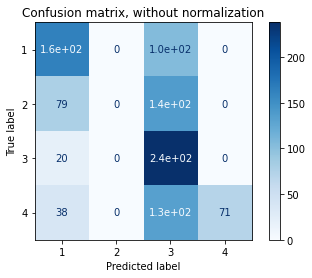

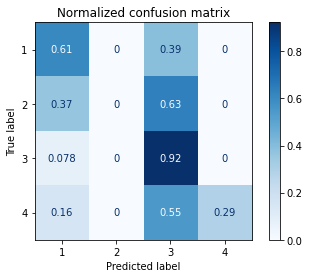

In [55]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(treemodel_max3, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

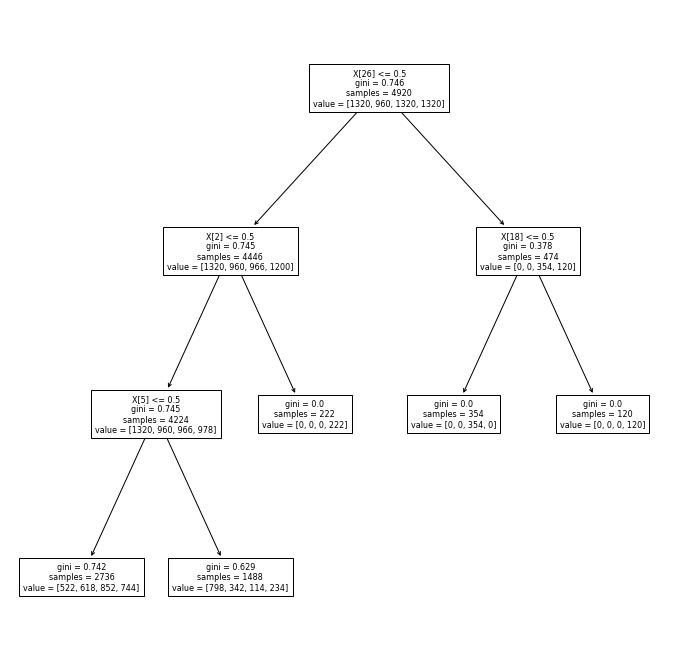

In [56]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(treemodel_max3.fit(X, y), max_depth=3, fontsize=8)
plt.show()

accuracy loss is unacceptable, lets try again with 10 layers

In [57]:
treemodel_max10 = DecisionTreeClassifier(max_depth=10)

In [58]:
treemodel_max10.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
predicted_train = treemodel_max10.predict(X_train)
accuracy_score(y_train, predicted_train)

0.7644817073170732

In [60]:
y_pred = treemodel_max10.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.7713414634146342

Confusion matrix, without normalization
[[201  25  42   0]
 [ 36 163  17   0]
 [  2   0 256   0]
 [ 18   0  85 139]]
Normalized confusion matrix
[[0.75       0.09328358 0.15671642 0.        ]
 [0.16666667 0.75462963 0.0787037  0.        ]
 [0.00775194 0.         0.99224806 0.        ]
 [0.07438017 0.         0.35123967 0.57438017]]


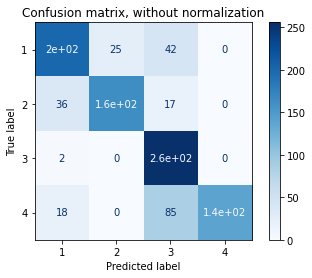

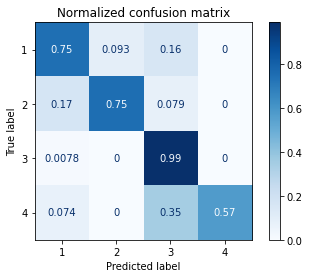

In [62]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(treemodel_max10, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

accuracy loss is still too great even at 10 levels, there is no point in going further with a model this complicated, we will try using random forests

# Random Forests Model

In [63]:
#Split data for random forests
y = disease_clean['triage']
X = disease_clean.drop(['triage','diagnosis'], axis =1)

In [64]:
#split data intro train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
#Create model to compare to decision tree with a max depth of 3
classifier_max3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 3, random_state = 42)
classifier_max3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [67]:
# Predicting the Test set results
y_pred = classifier_max3.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1   2   3    4
Acutal Triage                     
1                 214   0   0   54
2                  79  93   0   44
3                  48   0  92  118
4                  18   0   2  222


In [68]:
predicted_train = classifier_max3.predict(X_train)
accuracy_score(y_train, predicted_train)

0.6440548780487805

In [69]:
predicted_test = classifier_max3.predict(X_test)
accuracy_score(y_test, predicted_test)

0.6310975609756098

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.80      0.68       268
           2       1.00      0.43      0.60       216
           3       0.98      0.36      0.52       258
           4       0.51      0.92      0.65       242

    accuracy                           0.63       984
   macro avg       0.77      0.63      0.62       984
weighted avg       0.76      0.63      0.62       984



Improved performance with random forests limited to 3 levels, however it is not great

In [71]:
#Create model to compare to decision tree with a max depth of 10
classifier_max10 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 10, random_state = 42)
classifier_max10.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
# Predicting the Test set results
y_pred = classifier_max10.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 238    0    1   29
2                  52  121    2   41
3                   4    0  248    6
4                  17    0    0  225


In [73]:
predicted_train = classifier_max10.predict(X_train)
accuracy_score(y_train, predicted_train)

0.858739837398374

In [74]:
predicted_test = classifier_max10.predict(X_test)
accuracy_score(y_test, predicted_test)

0.8455284552845529

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.89      0.82       268
           2       1.00      0.56      0.72       216
           3       0.99      0.96      0.97       258
           4       0.75      0.93      0.83       242

    accuracy                           0.85       984
   macro avg       0.88      0.83      0.84       984
weighted avg       0.87      0.85      0.84       984



10 layers yields decent performance, next we will attempt unlimited layers to gauge max performance of the model

In [76]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 209   25    0   34
2                  34  170    2   10
3                   2    0  250    6
4                   2    0    0  240


In [78]:
predicted_train = classifier.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9057418699186992

In [79]:
predicted_test = classifier.predict(X_test)
accuracy_score(y_test, predicted_test)

0.883130081300813

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.85      0.78      0.81       268
           2       0.87      0.79      0.83       216
           3       0.99      0.97      0.98       258
           4       0.83      0.99      0.90       242

    accuracy                           0.88       984
   macro avg       0.88      0.88      0.88       984
weighted avg       0.89      0.88      0.88       984



No cap on layers leads to accuracy equal to the intial decision trees model,

In [81]:
#assesing feature importances
features = list(zip(disease_clean.columns[0:130], classifier.feature_importances_))
features.sort(key=lambda x:x[1])
for i in features:
    print(i)

('weakness_in_limbs', 0.005797620177403702)
('slurred_speech', 0.006656713427554625)
('blood_in_sputum', 0.00757202422794783)
('belly_pain', 0.00798705987763546)
('polyuria', 0.008408441130708155)
('puffy_face_and_eyes', 0.008947407435036315)
('lack_of_concentration', 0.009347918345559146)
('pain_behind_the_eyes', 0.011003481722514002)
('pus_filled_pimples', 0.015319397214299367)
('silver_like_dusting', 0.021540464340563354)
('foul_smell_of urine', 0.021595251617393424)
('burning_micturition', 0.022814640036530328)
('indigestion', 0.023603330164028345)
('family_history', 0.023680888832291875)
('dehydration', 0.02481475296468492)
('red_sore_around_nose', 0.02511549714895077)
('muscle_weakness', 0.025295098955439105)
('pain_during_bowel_movements', 0.025887061158918895)
('unsteadiness', 0.02658870982915561)
('lethargy', 0.02760361817854914)
('weakness_of_one_body_side', 0.02835813838300759)
('nodal_skin_eruptions', 0.028723532420564853)
('patches_in_throat', 0.02876930580201772)
('stomac

# Feature analysis using SHAP

In [82]:
import shap
shap.initjs()

In [83]:
explainer = shap.TreeExplainer(classifier)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [84]:
shap_values = explainer.shap_values(X_test, check_additivity=False)

In [85]:
shap_values

[array([[ 0.01561479,  0.00650988,  0.01242483, ...,  0.00552033,
          0.00673163,  0.00619029],
        [ 0.03572747,  0.00475115,  0.01062844, ..., -0.07063144,
          0.00405727,  0.00394633],
        [-0.01510269,  0.00369634,  0.01112222, ...,  0.00165846,
          0.00244869,  0.0028252 ],
        ...,
        [ 0.10171861,  0.01276339,  0.02256558, ...,  0.0074417 ,
          0.01449487,  0.01077319],
        [ 0.03572747,  0.00475115,  0.01062844, ..., -0.07063144,
          0.00405727,  0.00394633],
        [-0.01853986,  0.00404061,  0.01092959, ...,  0.00242075,
          0.00358309,  0.00336605]]),
 array([[ 0.04233654, -0.04723148,  0.00972744, ...,  0.04216133,
          0.02788748,  0.02152663],
        [-0.00903301, -0.05041286,  0.00508767, ..., -0.10861254,
          0.00686573,  0.00692267],
        [ 0.00923289, -0.00939108,  0.00302638, ...,  0.00161152,
          0.00152817,  0.00202653],
        ...,
        [-0.03079551, -0.02099877,  0.00367075, ...,  0.0047086 ,
          0.00360955,  0.00360688],
        [-0.00903301, -0.05041286,  0.00508767, ..., -0.10861254,
          0.00686573,  0.00692267],
        [-0.00173785, -0.02387277,  0.00492844, ...,  0.0051346 ,
          0.0041444 ,  0.00376035]]),
 array([[ 0.13179195,  0.02903927,  0.01247281, ..., -0.0667894 ,
         -0.05237138,  0.02817762],
        [ 0.05802675,  0.0413223 ,  0.0199534 , ...,  0.29625903,
         -0.01738489,  0.02657994],
        [-0.00199583,  0.00359356,  0.00596327, ..., -0.0047826 ,
         -0.0064266 ,  0.0062147 ],
        ...,
        [ 0.00991938,  0.00513062,  0.00386538, ..., -0.01532273,
         -0.02218862,  0.0050005 ],
        [ 0.05802675,  0.0413223 ,  0.0199534 , ...,  0.29625903,
         -0.01738489,  0.02657994],
        [-0.02736359,  0.00513571,  0.00588649, ..., -0.0162233 ,
         -0.02369767,  0.00518275]]),
 array([[-0.18974328,  0.01168233, -0.03462509, ...,  0.01910773,
          0.01775227, -0.05589454],
        [-0.08472121,  0.00433941, -0.03566951, ..., -0.11701505,
          0.0064619 , -0.03744894],
        [ 0.00786563,  0.00210119, -0.02011187, ...,  0.00151262,
          0.00244975, -0.01106643],
        ...,
        [-0.08084247,  0.00310476, -0.03010172, ...,  0.00317242,
          0.0040842 , -0.01938057],
        [-0.08472121,  0.00433941, -0.03566951, ..., -0.11701505,
          0.0064619 , -0.03744894],
        [ 0.0476413 ,  0.01469645, -0.02174452, ...,  0.00866794,
          0.01597018, -0.01230915]])]

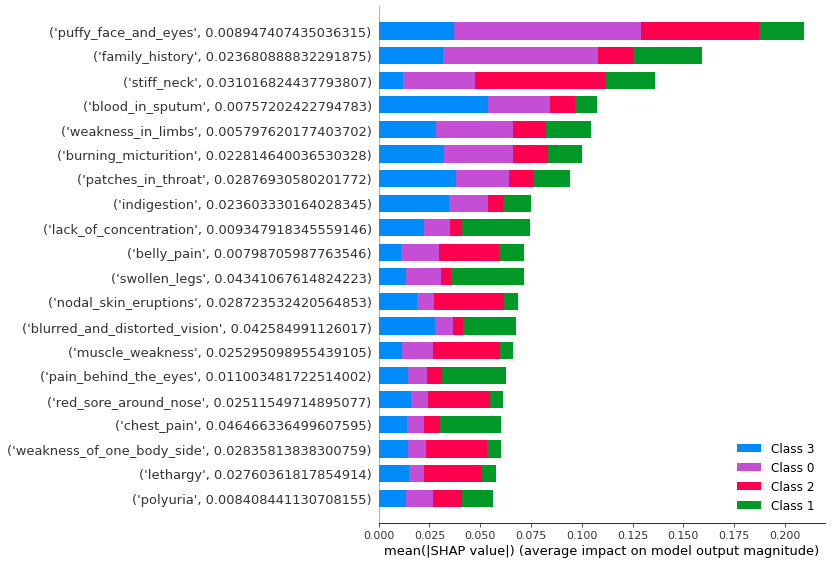

In [86]:
shap.summary_plot(shap_values, X_test, features)

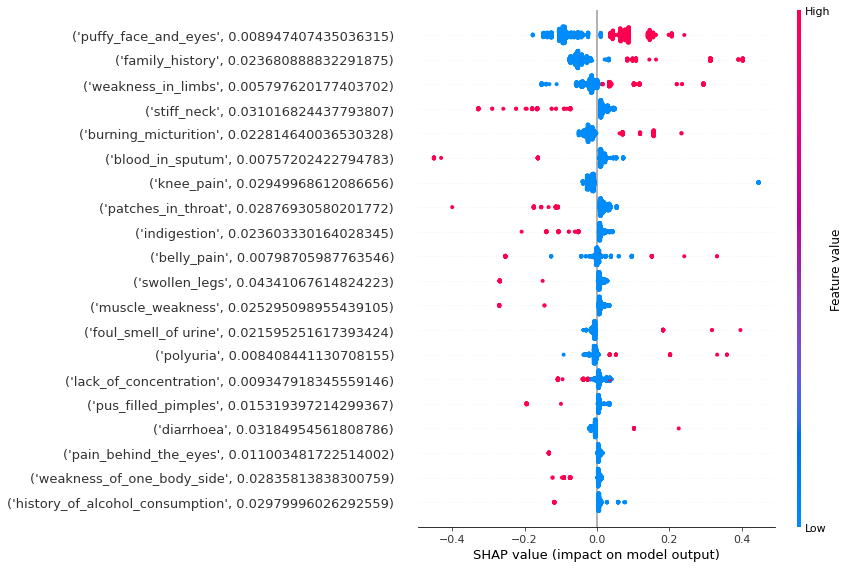

In [87]:
shap.summary_plot(shap_values[0], X_test, features)

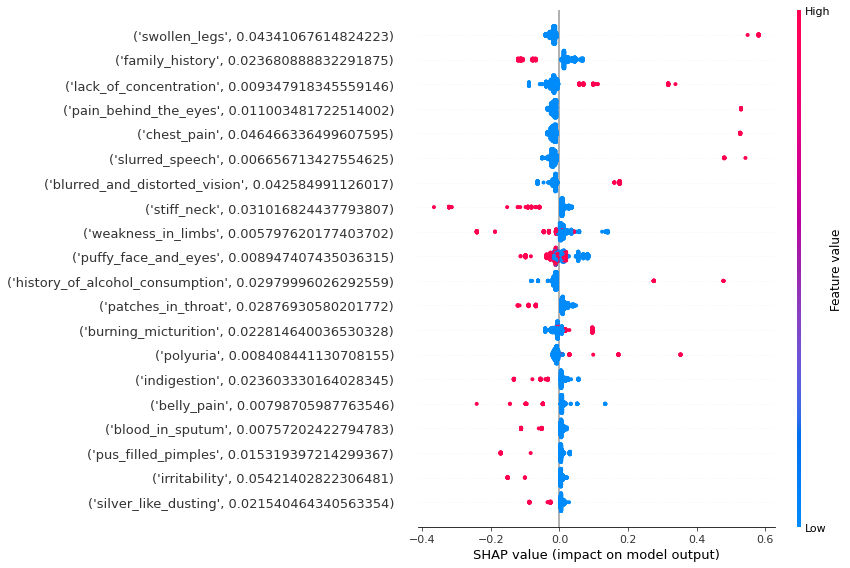

In [88]:
shap.summary_plot(shap_values[1], X_test, features)

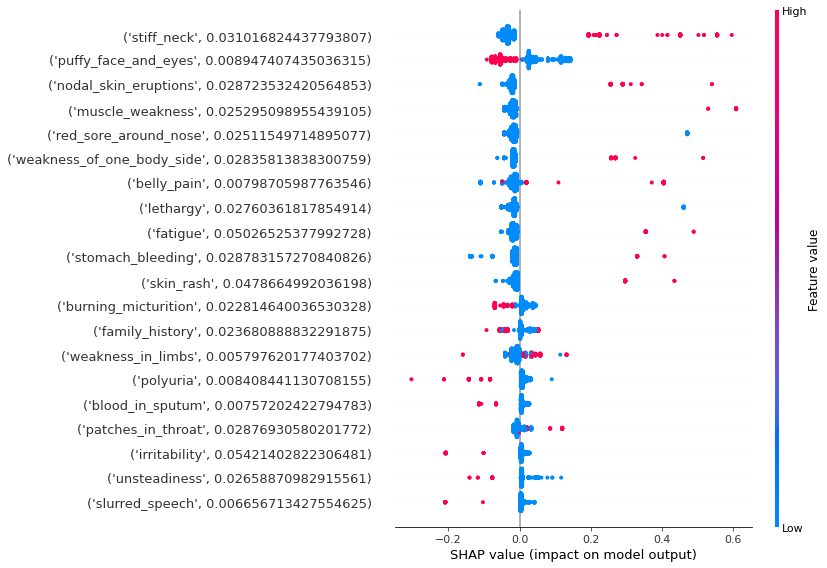

In [89]:
shap.summary_plot(shap_values[2], X_test, features)

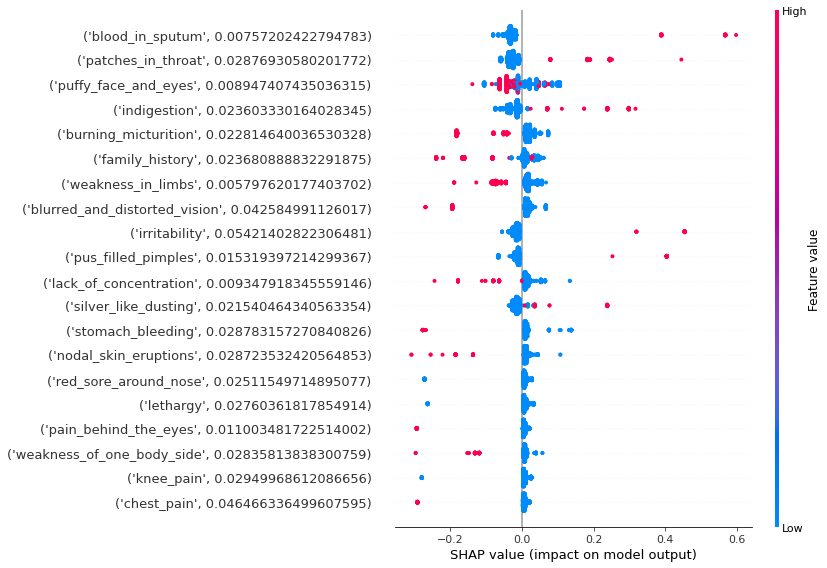

In [90]:
shap.summary_plot(shap_values[3], X_test, features)

Overall takeaway from SHAP is that every feature contributes at least slightly to every class, with some features contribtuing significantly to one or two classes. 

# Assessing Feature importance by recursively dropping features 

In [91]:
#determining feature importances
from sklearn.base import clone

X_train = pd.DataFrame(X_train)

model_clone = clone(classifier)
model_clone.random_state = 42
model_clone.fit(X_train, y_train)
benchmark_score = model_clone.score(X_train, y_train)
importances = []

for col in X_train.columns:
    model_clone = clone(classifier)
    model_clone.random_state = 42
    model_clone.fit(X_train.drop(col, axis = 1), y_train)
    drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
    importances.append(benchmark_score - drop_col_score)
    
for (a,b) in zip(disease_clean.columns, importances):
    print(a ,"; Importance: ", b)

skin_rash ; Importance:  0.028709349593495914
nodal_skin_eruptions ; Importance:  0.004065040650406471
continuous_sneezing ; Importance:  0.022357723577235755
stomach_pain ; Importance:  0.027693089430894324
burning_micturition ; Importance:  0.006351626016260159
fatigue ; Importance:  0.0022865853658536883
lethargy ; Importance:  0.024390243902439046
patches_in_throat ; Importance:  0.02083333333333337
dehydration ; Importance:  0.019308943089430874
indigestion ; Importance:  0.0
pain_behind_the_eyes ; Importance:  0.0022865853658536883
diarrhoea ; Importance:  0.020325203252032575
blurred_and_distorted_vision ; Importance:  0.0
chest_pain ; Importance:  0.026930894308943132
weakness_in_limbs ; Importance:  0.0
pain_during_bowel_movements ; Importance:  0.02184959349593496
swollen_legs ; Importance:  0.02388211382113825
puffy_face_and_eyes ; Importance:  0.0
slurred_speech ; Importance:  0.0
knee_pain ; Importance:  0.023628048780487854
muscle_weakness ; Importance:  0.001016260162601

In [92]:
disease_clean_2 = disease_clean.drop(['muscle_weakness'], axis =1)

In [93]:
disease_clean_2

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,diagnosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,3
4916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Acne,3
4917,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Urinary tract infection,2
4918,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Psoriasis,3


In [94]:
#Split data for random forests
y2 = disease_clean_2['triage']
X2 = disease_clean_2.drop(['triage','diagnosis'], axis =1)

In [95]:
#split data intro train, test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [96]:
#Scale data
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [97]:
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [98]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test2)
# Making the Confusion Matrix
print(pd.crosstab(y_test2, y_pred2, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 209   25    0   34
2                  34  170    2   10
3                   2    0  248    8
4                   2    0    0  240


In [99]:
predicted_train2 = classifier2.predict(X_train2)
accuracy_score(y_train2, predicted_train2)

0.9047256097560976

In [100]:
predicted_test2 = classifier2.predict(X_test2)
accuracy_score(y_test2, predicted_test2)

0.8810975609756098

In [101]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           1       0.85      0.78      0.81       268
           2       0.87      0.79      0.83       216
           3       0.99      0.96      0.98       258
           4       0.82      0.99      0.90       242

    accuracy                           0.88       984
   macro avg       0.88      0.88      0.88       984
weighted avg       0.88      0.88      0.88       984



In [102]:
#determining feature importances
from sklearn.base import clone

X_train2 = pd.DataFrame(X_train2)

model_clone = clone(classifier2)
model_clone.random_state = 42
model_clone.fit(X_train2, y_train2)
benchmark_score = model_clone.score(X_train2, y_train2)
importances = []

for col in X_train2.columns:
    model_clone = clone(classifier2)
    model_clone.random_state = 42
    model_clone.fit(X_train2.drop(col, axis = 1), y_train2)
    drop_col_score = model_clone.score(X_train2.drop(col, axis = 1), y_train2)
    importances.append(benchmark_score - drop_col_score)
    
for (a,b) in zip(disease_clean_2.columns, importances):
    print("Feature:", a ,"; Importance: ", b)

Feature: skin_rash ; Importance:  0.028709349593496025
Feature: nodal_skin_eruptions ; Importance:  0.004065040650406582
Feature: continuous_sneezing ; Importance:  0.022357723577235866
Feature: stomach_pain ; Importance:  0.027693089430894324
Feature: burning_micturition ; Importance:  0.00635162601626027
Feature: fatigue ; Importance:  0.0022865853658536883
Feature: lethargy ; Importance:  0.024390243902439046
Feature: patches_in_throat ; Importance:  0.02083333333333337
Feature: dehydration ; Importance:  0.019308943089430985
Feature: indigestion ; Importance:  0.0
Feature: pain_behind_the_eyes ; Importance:  0.0022865853658536883
Feature: diarrhoea ; Importance:  0.020325203252032575
Feature: blurred_and_distorted_vision ; Importance:  0.0
Feature: chest_pain ; Importance:  0.026930894308943132
Feature: weakness_in_limbs ; Importance:  0.0
Feature: pain_during_bowel_movements ; Importance:  0.02184959349593496
Feature: swollen_legs ; Importance:  0.02388211382113825
Feature: puffy_

In [103]:
explainer = shap.TreeExplainer(classifier2)
shap_values = explainer.shap_values(X_test2, check_additivity=False)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


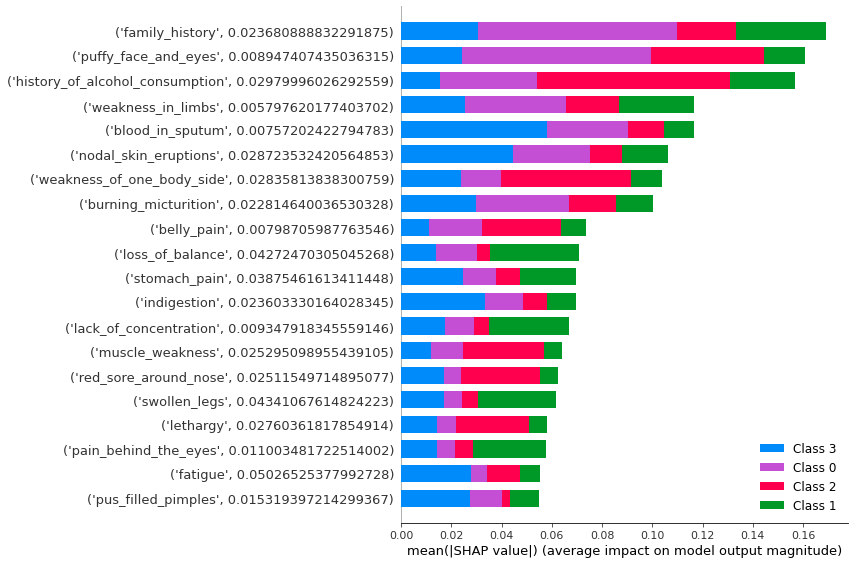

In [104]:
shap.summary_plot(shap_values, X_test2, features)

Since there is disagreement between SHAP and recursively dropping features to assess importance, and attempting to drop further features does not provide a benefit. We will stop tuning the model here. Overall the ability to classify the level of triage required for 41 distinct diseases from 36 self-diagnosable symptoms with 90% accuracy is a signficiant first step towards developing a model that can be used to help patients to conduct self-triage when deciding to how quickly to seek medical care for their conditions. 

# Final Model Results

In [105]:
disease_clean.head()

,skin_rash,nodal_skin_eruptions,continuous_sneezing,stomach_pain,burning_micturition,fatigue,lethargy,patches_in_throat,dehydration,indigestion,pain_behind_the_eyes,diarrhoea,blurred_and_distorted_vision,chest_pain,weakness_in_limbs,pain_during_bowel_movements,swollen_legs,puffy_face_and_eyes,slurred_speech,knee_pain,muscle_weakness,stiff_neck,loss_of_balance,unsteadiness,weakness_of_one_body_side,foul_smell_of urine,irritability,belly_pain,polyuria,family_history,lack_of_concentration,stomach_bleeding,history_of_alcohol_consumption,blood_in_sputum,pus_filled_pimples,silver_like_dusting,red_sore_around_nose,diagnosis,triage
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,2


In [106]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Acutal Triage'], colnames=['Predicted Triage']))

Predicted Triage    1    2    3    4
Acutal Triage                       
1                 209   25    0   34
2                  34  170    2   10
3                   2    0  250    6
4                   2    0    0  240


In [107]:
predicted_train = classifier.predict(X_train)
accuracy_score(y_train, predicted_train)

0.9057418699186992

In [108]:
predicted_test = classifier.predict(X_test)
accuracy_score(y_test, predicted_test)

0.883130081300813

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.85      0.78      0.81       268
           2       0.87      0.79      0.83       216
           3       0.99      0.97      0.98       258
           4       0.83      0.99      0.90       242

    accuracy                           0.88       984
   macro avg       0.88      0.88      0.88       984
weighted avg       0.89      0.88      0.88       984



Confusion matrix, without normalization
[[209  25   0  34]
 [ 34 170   2  10]
 [  2   0 250   6]
 [  2   0   0 240]]
Normalized confusion matrix
[[0.77985075 0.09328358 0.         0.12686567]
 [0.15740741 0.78703704 0.00925926 0.0462963 ]
 [0.00775194 0.         0.96899225 0.02325581]
 [0.00826446 0.         0.         0.99173554]]


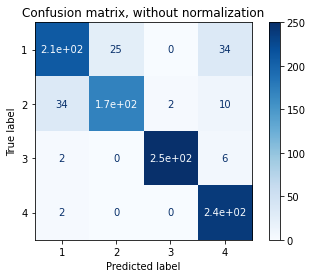

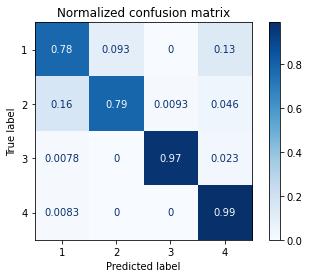

In [110]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()